In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession,SQLContext, Row
import pyspark.sql.functions as F

from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.sql.functions import col, log, isnan, count
from pyspark.ml.feature import Imputer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

In [2]:
# Importing and configuration of Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Capstone_project").config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083").enableHiveSupport().getOrCreate()

In [3]:
spark

In [4]:
spark.sql('show databases').show(5)

+------------+
|databaseName|
+------------+
|   01may2022|
|   09may2022|
|     09may22|
|   10nov2011|
|   12oct2022|
+------------+
only showing top 5 rows



In [5]:
spark.sql('use exl_project_level_1').show()

++
||
++
++



In [6]:
spark.sql('show tables').show()

+-------------------+--------------------+-----------+
|           database|           tableName|isTemporary|
+-------------------+--------------------+-----------+
|exl_project_level_1|department_employees|      false|
|exl_project_level_1|  department_manager|      false|
|exl_project_level_1|         departments|      false|
|exl_project_level_1|           employees|      false|
|exl_project_level_1|            salaries|      false|
|exl_project_level_1|              titles|      false|
+-------------------+--------------------+-----------+



## 1.(A) List the following details of each employee: employee number, last name, first name, sex, and salary.

In [7]:
spark.sql("""SELECT employees.emp_no, employees.last_name, employees.first_name, employees.sex, salaries.salary
FROM employees
JOIN salaries
ON employees.emp_no = salaries.emp_no""").show(5,truncate=False)

+------+---------+----------+---+------+
|emp_no|last_name|first_name|sex|salary|
+------+---------+----------+---+------+
|10001 |Facello  |Georgi    |M  |60117 |
|10002 |Simmel   |Bezalel   |F  |65828 |
|10003 |Bamford  |Parto     |M  |40006 |
|10004 |Koblick  |Chirstian |M  |40054 |
|10005 |Maliniak |Kyoichi   |M  |78228 |
+------+---------+----------+---+------+
only showing top 5 rows



## 1.(B) List first name, last name, and hire date for employees who were hired in 1986.

In [8]:
spark.sql("""SELECT first_name, last_name, hire_date 
FROM employees
WHERE hire_date BETWEEN '1/1/1986' AND '12/31/1986'
ORDER BY hire_date""").show(5,truncate=False)

+----------+---------+---------+
|first_name|last_name|hire_date|
+----------+---------+---------+
|Shawna    |Reinhart |1/1/1986 |
|Alejandra |Luce     |1/1/1986 |
|Hercules  |Veevers  |1/1/1986 |
|Nathalie  |Speer    |1/1/1986 |
|Moto      |Kenevan  |1/1/1986 |
+----------+---------+---------+
only showing top 5 rows



## 2. List the manager of each department with the following information: department number, department name, the managers employee number, last name, first name. 

In [9]:
spark.sql("""SELECT departments.dept_no, departments.dept_name, department_manager.emp_no, employees.last_name, employees.first_name
FROM departments
JOIN department_manager
ON departments.dept_no = department_manager.dept_no
JOIN employees
ON department_manager.emp_no = employees.emp_no""").show(5,truncate=False)

+-------+---------------+------+------------+----------+
|dept_no|dept_name      |emp_no|last_name   |first_name|
+-------+---------------+------+------------+----------+
|d001   |Marketing      |110022|Markovitch  |Margareta |
|d001   |Marketing      |110039|Minakawa    |Vishwani  |
|d002   |Finance        |110085|Alpin       |Ebru      |
|d002   |Finance        |110114|Legleitner  |Isamu     |
|d003   |Human Resources|110183|Ossenbruggen|Shirish   |
+-------+---------------+------+------------+----------+
only showing top 5 rows



## 3. List the department of each employee with the following information: employee number, last name, first name, and department name.

In [10]:
spark.sql("""SELECT department_employees.emp_no, employees.last_name, employees.first_name, departments.dept_name
FROM department_employees
JOIN employees
ON department_employees.emp_no = employees.emp_no
JOIN departments
ON department_employees.dept_no = departments.dept_no""").show(5,truncate=False)

+------+---------+----------+---------------+
|emp_no|last_name|first_name|dept_name      |
+------+---------+----------+---------------+
|10001 |Facello  |Georgi    |development    |
|10002 |Simmel   |Bezalel   |Sales          |
|10003 |Bamford  |Parto     |Production     |
|10004 |Koblick  |Chirstian |Production     |
|10005 |Maliniak |Kyoichi   |Human Resources|
+------+---------+----------+---------------+
only showing top 5 rows



## 4. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

In [11]:
spark.sql("""SELECT employees.first_name, employees.last_name, employees.sex
FROM employees
WHERE first_name = 'Hercules'
AND last_name Like 'B%'""").show(truncate=False)

+----------+-------------+---+
|first_name|last_name    |sex|
+----------+-------------+---+
|Hercules  |Benzmuller   |M  |
|Hercules  |Brendel      |F  |
|Hercules  |Baranowski   |M  |
|Hercules  |Barreiro     |M  |
|Hercules  |Baer         |M  |
|Hercules  |Bernardinello|F  |
|Hercules  |Basagni      |M  |
|Hercules  |Biran        |F  |
|Hercules  |Bernatsky    |M  |
|Hercules  |Bail         |F  |
|Hercules  |Birge        |F  |
|Hercules  |Bisiani      |F  |
|Hercules  |Bodoff       |M  |
|Hercules  |Biron        |F  |
|Hercules  |Buchter      |M  |
|Hercules  |Bain         |F  |
|Hercules  |Bahr         |M  |
|Hercules  |Baak         |M  |
|Hercules  |Benantar     |F  |
|Hercules  |Berstel      |F  |
+----------+-------------+---+



## 5. A list showing all employees in the Sales department, including their employee number, last name, first name, and department name.

In [12]:
spark.sql("""SELECT department_employees.emp_no, departments.dept_name, employees.last_name, employees.first_name
FROM department_employees
JOIN employees
ON department_employees.emp_no = employees.emp_no
JOIN departments
ON department_employees.dept_no = departments.dept_no
WHERE departments.dept_name = 'Sales'""").show(5,truncate=False)

+------+---------+-----------+----------+
|emp_no|dept_name|last_name  |first_name|
+------+---------+-----------+----------+
|10002 |Sales    |Simmel     |Bezalel   |
|10016 |Sales    |Cappelletti|Kazuhito  |
|10034 |Sales    |Swan       |Bader     |
|10041 |Sales    |Lenart     |Uri       |
|10050 |Sales    |Dredge     |Yinghua   |
+------+---------+-----------+----------+
only showing top 5 rows



## 6. A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

In [13]:
spark.sql("""SELECT department_employees.emp_no, employees.last_name, employees.first_name, departments.dept_name
FROM department_employees
JOIN employees
ON department_employees.emp_no = employees.emp_no
JOIN departments
ON department_employees.dept_no = departments.dept_no
WHERE departments.dept_name = 'Sales' 
OR departments.dept_name = 'Development'""").show(5,truncate=False)

+------+-----------+----------+---------+
|emp_no|last_name  |first_name|dept_name|
+------+-----------+----------+---------+
|10002 |Simmel     |Bezalel   |Sales    |
|10016 |Cappelletti|Kazuhito  |Sales    |
|10034 |Swan       |Bader     |Sales    |
|10041 |Lenart     |Uri       |Sales    |
|10050 |Dredge     |Yinghua   |Sales    |
+------+-----------+----------+---------+
only showing top 5 rows



## 7. A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name).

In [14]:
spark.sql("""select last_name,count(last_name) as Frequency 
from employees 
group by last_name
order by frequency desc""").show(5,truncate=False)

+---------+---------+
|last_name|Frequency|
+---------+---------+
|Baba     |226      |
|Gelosh   |223      |
|Coorg    |223      |
|Farris   |222      |
|Sudbeck  |222      |
+---------+---------+
only showing top 5 rows



## 8. Histogram to show the salary distribution among the employees

In [15]:
df  = spark.sql("""select * from salaries""").toPandas()

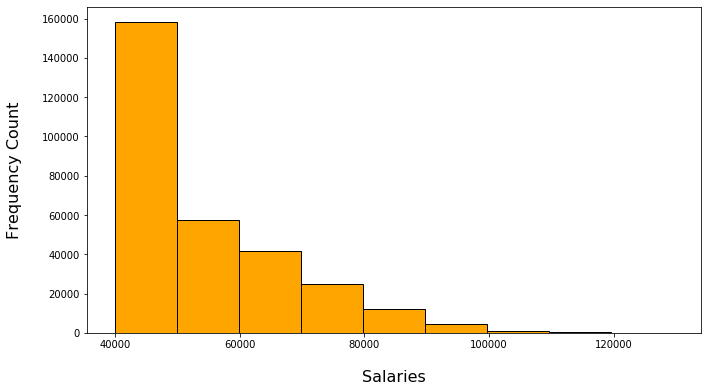

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.hist(df['salary'],bins=9,color='orange',alpha=1,edgecolor='black')
plt.xlabel('Salaries',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)
plt.show()

## 9. Bar graph to show the Average salary per title (designation)

In [17]:
df = spark.sql("""select title,round(avg(salary),0) as Avg_salary from titles join employees on titles.title_id = employees.emp_titles_id 
                  join salaries on employees.emp_no = salaries.emp_no group by title""").toPandas()

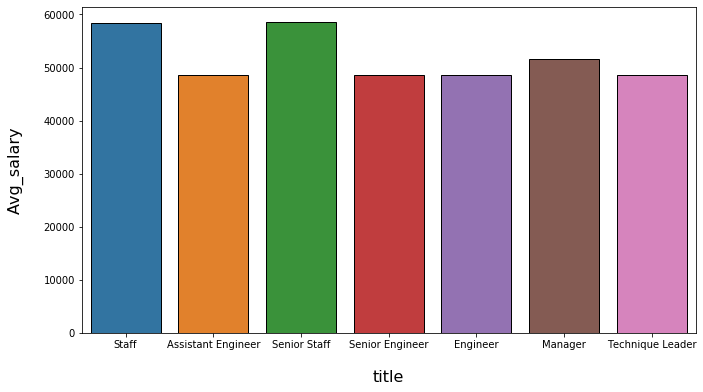

In [18]:
import seaborn as sns
plt.figure(figsize=(11,6))
sns.barplot(df['title'],df['Avg_salary'],alpha=1,edgecolor='black')
plt.xlabel('title',fontsize=16,color='black',labelpad=20)
plt.ylabel('Avg_salary',fontsize=16,color='black',labelpad=20)
plt.show()

## 10. Calculate employee tenure & show the tenure distribution among the employees.

In [19]:
import pandas as pd
import datetime as dt
df = spark.sql("select hire_date,replace(last_date,'\r','') as last_date from employees").toPandas()
df = pd.to_datetime(df['last_date'].replace("",max(df['hire_date']))) - pd.to_datetime(df['hire_date'])
df = df.value_counts()

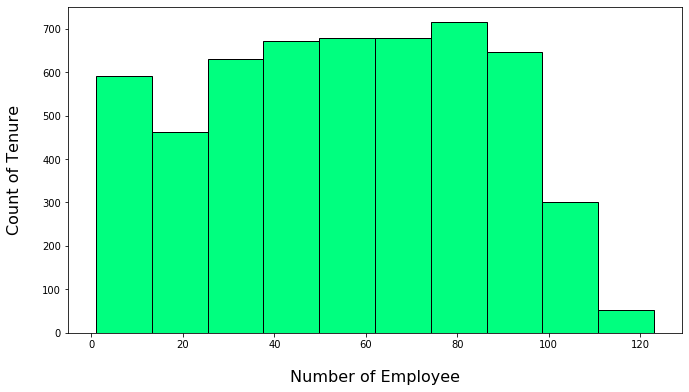

In [20]:
plt.figure(figsize=(11,6))
plt.hist(df,color='springgreen',alpha=1,edgecolor='black')
plt.xlabel('Number of Employee',fontsize=16,color='black',labelpad=20)
plt.ylabel('Count of Tenure',fontsize=16,color='black',labelpad=20)
plt.show()

# Additional Analysis

## 11. A list showing count of employees by titles.

In [21]:
spark.sql("""select title_id,title,count(1) as Number_of_employees from employees join titles on employees.emp_titles_id = titles.title_id group by title_id, title order by Number_of_employees desc""").show()

+--------+------------------+-------------------+
|title_id|             title|Number_of_employees|
+--------+------------------+-------------------+
|   s0001|             Staff|             107384|
|   e0003|   Senior Engineer|              97747|
|   e0002|          Engineer|              47303|
|   s0002|      Senior Staff|              26583|
|   e0004|  Technique Leader|              15148|
|   e0001|Assistant Engineer|               5835|
|   m0001|           Manager|                 24|
+--------+------------------+-------------------+



## 12. Number of Male and Female Managers.

In [22]:
spark.sql("select employees.sex, count(department_manager.emp_no) as Number_of_managers from employees join department_manager on employees.emp_no = department_manager.emp_no group by employees.sex ").show()

+---+------------------+
|sex|Number_of_managers|
+---+------------------+
|  F|                13|
|  M|                11|
+---+------------------+



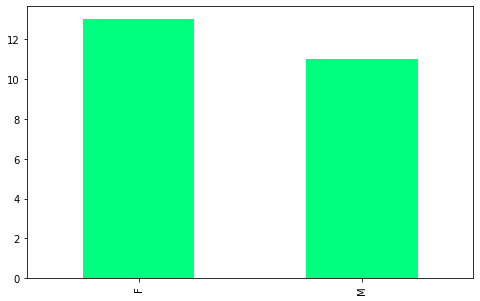

In [23]:
df = spark.sql("select employees.sex from employees join department_manager on employees.emp_no = department_manager.emp_no  ")
df = df.toPandas()
df = df.sex.value_counts()
plt.figure(figsize=(8,5))
df.plot(kind='bar',color='springgreen')
plt.show()

## 13. Names of all the Managers in the company.

In [24]:
spark.sql("select concat(first_name, ' ', last_name) as Managers_name from employees join department_manager on employees.emp_no = department_manager.emp_no  ").show(50)

+--------------------+
|       Managers_name|
+--------------------+
|Margareta Markovitch|
|   Vishwani Minakawa|
|          Ebru Alpin|
|    Isamu Legleitner|
|Shirish Ossenbruggen|
|     Karsten Sigstam|
|   Krassimir Wegerle|
|        Rosine Cools|
|         Shem Kieras|
|      Oscar Ghazalie|
|   DeForest Hagimont|
|       Leon DasSarma|
|   Peternela Onuegbe|
|      Rutger Hofmeyr|
|      Sanjoy Quadeer|
|          Dung Pesch|
|Przemyslawa Kaelb...|
|         Hauke Zhang|
|        Arie Staelin|
|       Hilary Kambil|
|   Tonny Butterworth|
|    Marjo Giarratana|
|    Xiaobin Spinelli|
|     Yuchang Weedman|
+--------------------+



## 14. Employees who are registered in more than one department.

In [25]:
df = spark.sql("select emp_no, count(emp_no) as frequency from department_employees group by emp_no having count(emp_no) > 1 order by frequency desc")
print(f"There are {df.count()} who are registered in more than one department.")

There are 31579 who are registered in more than one department.


## 15. Average Salary of Male and Female Managers.

In [26]:
spark.sql("""select employees.sex, round(avg(salaries.salary),0) Average_salary_of_managers_gender_wise from employees 
          join department_manager on employees.emp_no = department_manager.emp_no 
          join salaries on employees.emp_no = salaries.emp_no group by employees.sex""").show()

+---+--------------------------------------+
|sex|Average_salary_of_managers_gender_wise|
+---+--------------------------------------+
|  F|                               46662.0|
|  M|                               57285.0|
+---+--------------------------------------+



## 16. Average salary of Managers Departments wise.

In [27]:
spark.sql("""select departments.dept_name, count(*) as Number_of_Managers_department_wise, round(avg(salaries.salary),0) Average_salary_of_managers from employees 
          join department_manager on employees.emp_no = department_manager.emp_no 
          join salaries on employees.emp_no = salaries.emp_no
          join departments on department_manager.dept_no = departments.dept_no
          group by departments.dept_name""").show()

+------------------+----------------------------------+--------------------------+
|         dept_name|Number_of_Managers_department_wise|Average_salary_of_managers|
+------------------+----------------------------------+--------------------------+
|             Sales|                                 2|                   71380.0|
|Quality Management|                                 4|                   49260.0|
|           Finance|                                 2|                   56048.0|
|        Production|                                 4|                   43115.0|
|          Research|                                 2|                   60262.0|
|  Customer Service|                                 4|                   43462.0|
|         Marketing|                                 2|                   70554.0|
|       development|                                 2|                   44313.0|
|   Human Resources|                                 2|                   44146.0|
+---

# ML Classification Models

# Logistic Regression

In [28]:
employees = spark.sql("select * from employees")
titles = spark.sql("select * from titles")
salaries = spark.sql("select * from salaries")
department_employees = spark.sql("select * from department_employees")
department_manager = spark.sql("select * from department_manager")
departments = spark.sql("select * from departments")
df = employees.join(titles,employees.emp_titles_id == titles.title_id,"rightouter").join(department_employees,employees.emp_no == department_employees.emp_no,"rightouter").join(salaries,employees.emp_no == salaries.emp_no,"rightouter")
df_final = df.select('dept_no','sex','salary','no_of_projects','emp_left','last_performance_rating')
df_final.show(5)

+-------+---+------+--------------+--------+-----------------------+
|dept_no|sex|salary|no_of_projects|emp_left|last_performance_rating|
+-------+---+------+--------------+--------+-----------------------+
|   d005|  F| 40000|             8|       0|                      A|
|   d003|  M| 40000|             9|       0|                      B|
|   d008|  F| 60268|             2|       0|                      A|
|   d005|  F| 60268|             2|       0|                      A|
|   d009|  F| 54602|             6|       0|                      C|
+-------+---+------+--------------+--------+-----------------------+
only showing top 5 rows



#### StringIndexer

In [29]:
SI_dep_no = StringIndexer(inputCol='dept_no',outputCol='dept_no_index')
df_final = SI_dep_no.fit(df_final).transform(df_final)
SI_sex = StringIndexer(inputCol='sex',outputCol='sex_index')
df_final = SI_sex.fit(df_final).transform(df_final)
SI_last_performance_rating = StringIndexer(inputCol='last_performance_rating',outputCol='last_performance_rating_index')
df_final = SI_last_performance_rating.fit(df_final).transform(df_final)

In [30]:
df_final.show()

+-------+---+------+--------------+--------+-----------------------+-------------+---------+-----------------------------+
|dept_no|sex|salary|no_of_projects|emp_left|last_performance_rating|dept_no_index|sex_index|last_performance_rating_index|
+-------+---+------+--------------+--------+-----------------------+-------------+---------+-----------------------------+
|   d005|  F| 40000|             8|       0|                      A|          0.0|      1.0|                          1.0|
|   d003|  M| 40000|             9|       0|                      B|          7.0|      0.0|                          0.0|
|   d008|  F| 60268|             2|       0|                      A|          4.0|      1.0|                          1.0|
|   d005|  F| 60268|             2|       0|                      A|          0.0|      1.0|                          1.0|
|   d009|  F| 54602|             6|       0|                      C|          3.0|      1.0|                          2.0|
|   d007|  F| 54

#### Vector Assembler

In [31]:
assembler = VectorAssembler(inputCols = [ 'salary', 'no_of_projects','dept_no_index',
                                         'sex_index', 'last_performance_rating_index'],outputCol = "features")
output = assembler.transform(df_final)

In [32]:
output.select('features').show(5,truncate=False)

+-------------------------+
|features                 |
+-------------------------+
|[40000.0,8.0,0.0,1.0,1.0]|
|[40000.0,9.0,7.0,0.0,0.0]|
|[60268.0,2.0,4.0,1.0,1.0]|
|[60268.0,2.0,0.0,1.0,1.0]|
|[54602.0,6.0,3.0,1.0,2.0]|
+-------------------------+
only showing top 5 rows



In [33]:
final_data = output.select('features','emp_left')

In [34]:
final_data.show(5,truncate=False)

+-------------------------+--------+
|features                 |emp_left|
+-------------------------+--------+
|[40000.0,8.0,0.0,1.0,1.0]|0       |
|[40000.0,9.0,7.0,0.0,0.0]|0       |
|[60268.0,2.0,4.0,1.0,1.0]|0       |
|[60268.0,2.0,0.0,1.0,1.0]|0       |
|[54602.0,6.0,3.0,1.0,2.0]|0       |
+-------------------------+--------+
only showing top 5 rows



### Label Indexer

In [35]:
from pyspark.sql.functions import col,isnan, when, count
final_data = final_data.withColumn('label',when(final_data.emp_left == '1',1).otherwise(0))

In [36]:
#Build the Linear Regression Model
from pyspark.ml.classification import LogisticRegression 

In [37]:
#train test split
train_df,test_df = final_data.randomSplit( [0.7, 0.3], seed = 50 )

In [38]:
logrg = LogisticRegression(featuresCol= 'features',labelCol='label',maxIter=5)

In [39]:
lr = logrg.fit(train_df)

In [40]:
lr.intercept

-2.1515119557376847

In [41]:
lr.coefficients

DenseVector([-0.0, 0.0045, -0.0009, -0.0117, 0.0083])

In [42]:
y_pred_test = lr.transform(test_df)

In [43]:
y_pred_train = lr.transform(train_df)

In [44]:
y_pred_train.select(['label',
 'rawPrediction',
 'probability',
 'prediction']).toPandas().head(10)

,label,rawPrediction,probability,prediction
0,0,"[2.202618773815793, -2.202618773815793]","[0.9004844312615607, 0.09951556873843914]",0.0
1,1,"[2.202618773815793, -2.202618773815793]","[0.9004844312615607, 0.09951556873843914]",0.0
2,0,"[2.19816222597093, -2.19816222597093]","[0.9000843567321536, 0.09991564326784638]",0.0
3,0,"[2.19816222597093, -2.19816222597093]","[0.9000843567321536, 0.09991564326784638]",0.0
4,0,"[2.19816222597093, -2.19816222597093]","[0.9000843567321536, 0.09991564326784638]",0.0
5,1,"[2.193705678126067, -2.193705678126067]","[0.8996828529950082, 0.10031714700499186]",0.0
6,0,"[2.1892491302812034, -2.1892491302812034]","[0.899279916386459, 0.10072008361354093]",0.0
7,0,"[2.1847925824363403, -2.1847925824363403]","[0.8988755432452047, 0.10112445675479537]",0.0
8,0,"[2.1847925824363403, -2.1847925824363403]","[0.8988755432452047, 0.10112445675479537]",0.0
9,0,"[2.1847925824363403, -2.1847925824363403]","[0.8988755432452047, 0.10112445675479537]",0.0


In [45]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [46]:
evaluator = BinaryClassificationEvaluator()

In [47]:
evaluator.evaluate(y_pred_test)

0.5018113246728146

### Accuarcy

In [48]:
y_pred_test.filter(y_pred_test.label == y_pred_test.prediction).count() / float(y_pred_test.count())

0.9016284345853289

# Random Forest Regression

In [49]:
rfm = RandomForestClassifier(featuresCol="features",
                              labelCol="label",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')
rfm = rfm.fit(train_df)

In [50]:
pred = rfm.transform(test_df)
pred.show(10)

+--------------------+--------+-----+--------------------+--------------------+----------+
|            features|emp_left|label|       rawPrediction|         probability|prediction|
+--------------------+--------+-----+--------------------+--------------------+----------+
|(5,[0,1],[40000.0...|       0|    0|[44.9847427845892...|[0.89969485569178...|       0.0|
|(5,[0,1],[40000.0...|       0|    0|[44.9744547346177...|[0.89948909469235...|       0.0|
|(5,[0,1],[40000.0...|       0|    0|[44.9780217683243...|[0.89956043536648...|       0.0|
|(5,[0,1],[40000.0...|       0|    0|[44.9715802504721...|[0.89943160500944...|       0.0|
|(5,[0,1],[40000.0...|       0|    0|[44.9715802504721...|[0.89943160500944...|       0.0|
|(5,[0,1],[40000.0...|       0|    0|[44.9715802504721...|[0.89943160500944...|       0.0|
|(5,[0,1],[40000.0...|       0|    0|[44.9715802504721...|[0.89943160500944...|       0.0|
|(5,[0,1],[40000.0...|       0|    0|[44.9715802504721...|[0.89943160500944...|       0.0|

In [51]:
def train(train, test, classifier):
    # (train, test) = df.randomSplit([.7,.3])
    print(classifier)
    model = classifier.fit(train)

    pred = model.transform(test)

    eval_accuracy = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="accuracy"))

    eval_precision = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedPrecision"))

    eval_recall = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedRecall"))

    eval_f1 = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="f1"))

    accuracy = eval_accuracy.evaluate(pred)

    precision =  eval_precision.evaluate(pred)

    recall =  eval_recall.evaluate(pred)

    f1 =  eval_f1.evaluate(pred)

    print(f"""
    Accuracy  = {accuracy}
    Error     = {1-accuracy}
    Precision = {precision}
    Recall    = {recall}
    F1        = {f1}""")

    return model, pred

In [52]:
rfm2 = RandomForestClassifier(featuresCol="features",
                              labelCol="label",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')

In [53]:
_ , pred2 = train(train_df, test_df, rfm2)

pred2.select("prediction", "label", "features").show(10)

RandomForestClassifier_6da4b30f2f21

    Accuracy  = 0.9016284345853289
    Error     = 0.09837156541467107
    Precision = 0.8129338340527907
    Recall    = 0.9016284345853289
    F1        = 0.8549870408622282
+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|    0|(5,[0,1],[40000.0...|
|       0.0|    0|(5,[0,1],[40000.0...|
|       0.0|    0|(5,[0,1],[40000.0...|
|       0.0|    0|(5,[0,1],[40000.0...|
|       0.0|    0|(5,[0,1],[40000.0...|
|       0.0|    0|(5,[0,1],[40000.0...|
|       0.0|    0|(5,[0,1],[40000.0...|
|       0.0|    0|(5,[0,1],[40000.0...|
|       0.0|    0|(5,[0,1],[40000.0...|
|       0.0|    1|(5,[0,1],[40000.0...|
+----------+-----+--------------------+
only showing top 10 rows



# Building Pipline
### Preparing Data

In [54]:
employees = spark.sql("select * from employees")
titles = spark.sql("select * from titles")
salaries = spark.sql("select * from salaries")
department_employees = spark.sql("select * from department_employees")
department_manager = spark.sql("select * from department_manager")
departments = spark.sql("select * from departments")
df = employees.join(titles,employees.emp_titles_id == titles.title_id,"rightouter").join(department_employees,employees.emp_no == department_employees.emp_no,"rightouter").join(salaries,employees.emp_no == salaries.emp_no,"rightouter")
df_final = df.select('dept_no','sex','salary','no_of_projects','emp_left','last_performance_rating')

In [55]:
# String Indexer
SI_dep_no = StringIndexer(inputCol='dept_no',outputCol='dept_no_index')
SI_sex = StringIndexer(inputCol='sex',outputCol='sex_index')
SI_last_performance_rating = StringIndexer(inputCol='last_performance_rating',outputCol='last_performance_rating_index')

In [56]:
# Vector Assembler
assembler = VectorAssembler(inputCols = [ 'salary', 'no_of_projects','dept_no_index',
                                         'sex_index', 'last_performance_rating_index'],outputCol = "features")

In [57]:


# ML Model
rfm = RandomForestClassifier(featuresCol="features",
                              labelCol="label",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')

# Creating Pipeline
pipeline = Pipeline(stages= [SI_sex, SI_last_performance_rating, SI_dep_no, assembler, rfm])

# setting label column
df_final = df_final.withColumnRenamed('emp_left','label')

# Train Test Split

In [58]:
train, test = df_final.randomSplit([0.7, 0.3], seed = 42)

# Model Fitting

In [59]:
model = pipeline.fit(train)
y_pred_test = model.transform(test)
y_pred_test.select('label', 'features','prediction').show(10)

+-----+--------------------+----------+
|label|            features|prediction|
+-----+--------------------+----------+
|    0|[40000.0,3.0,5.0,...|       0.0|
|    0|[40000.0,5.0,5.0,...|       0.0|
|    0|[40000.0,6.0,5.0,...|       0.0|
|    0|[51070.0,3.0,5.0,...|       0.0|
|    0|[51725.0,6.0,5.0,...|       0.0|
|    0|[62716.0,3.0,5.0,...|       0.0|
|    0|[68855.0,1.0,5.0,...|       0.0|
|    0|[69834.0,2.0,5.0,...|       0.0|
|    0|[77823.0,3.0,5.0,...|       0.0|
|    0|[78460.0,6.0,5.0,...|       0.0|
+-----+--------------------+----------+
only showing top 10 rows

